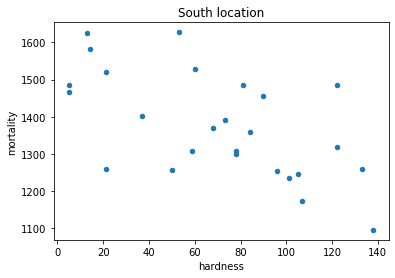

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('water.csv')
south_data = data[data.location == 'South']
north_data = data[data.location == 'North']
south_data.plot(kind = 'scatter', x = 'hardness', y = 'mortality')
plt.title('South location')
plt.show()

обратное направление корреляции

In [7]:
south_data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [8]:
south_data[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


корреляция имеет отрицательное значение, следовательно при уменьшении жесткости воды, смертность увеличивается, линейная связь слабая.

In [32]:
south_x = south_data[['hardness']]
south_y = south_data['mortality']

south_model = LinearRegression()
south_x_train, south_x_test, south_y_train, south_y_test = train_test_split(south_x, south_y, test_size=0.30, random_state=2)
south_model.fit(south_x_train, south_y_train)
south_model.coef_

array([-2.88808313])

In [33]:
south_model.intercept_

1592.7550546229684

In [34]:
south_model.score(south_x_test, south_y_test)

-0.609800020236841

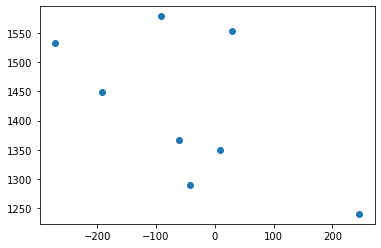

In [35]:
south_y_pred = south_model.predict(south_x_test)
south_y_diff = south_y_test - south_y_pred
plt.scatter(south_y_diff, south_y_pred)
plt.show()

остатки ведут себя хаотично, следовательно построенная модель адекватна.

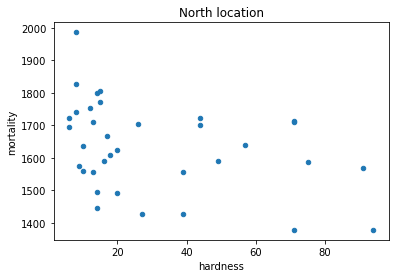

In [14]:
north_data.plot(kind = 'scatter', x = 'hardness', y = 'mortality')
plt.title('North location')
plt.show()

выбор направления корреляции затруднителен.

In [15]:
north_data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [17]:
north_data[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


корреляция имеет отрицательное значение, следовательно при уменьшении жесткости воды, смертность увеличивается, линейная связь слабая.

In [26]:
north_x = north_data[['hardness']]
north_y = north_data['mortality']

north_model = LinearRegression()
north_x_train, north_x_test, north_y_train, north_y_test = train_test_split(north_x, north_y, test_size=0.30, random_state=42)
north_model.fit(north_x_train, north_y_train)
north_model.coef_

array([-1.97686226])

In [27]:
north_model.intercept_

1688.150229031281

In [28]:
north_model.score(north_x_test, north_y_test)

0.018885304285745863

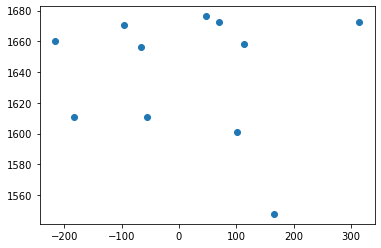

In [31]:
north_y_pred = north_model.predict(north_x_test)
north_y_diff = north_y_test - north_y_pred
plt.scatter(north_y_diff, north_y_pred)
plt.show()

остатки ведут себя хаотчино, следовательно построенная модель адекватна.

Общий вывод: при группировке данных по регионам можно сделать вывод, что уровень жесткости воды больше влияет на уровень смертности жителей северных регионов (чем ниже жесткость воды, тем выше смертность).   